In [193]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [194]:
# Importo i dati 
data = pd.read_csv('C:/Users/massi/OneDrive/Desktop/Titanic.csv')

In [195]:
# Dimensioni del data set
data.shape  # 891 osservazioni x 13 variabili

(891, 13)

In [196]:
# Nomi delle colonne
data.columns.values

array(['Unnamed: 0', 'PassengerId', 'Survived', 'Pclass', 'Name', 'Sex',
       'Age', 'SibSp', 'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype=object)

In [197]:
# Controllo eventuali valori duplicati
data.duplicated().sum()

0

In [198]:
# Rimuovo le colonne
data.drop('Unnamed: 0', inplace=True, axis=1)

In [199]:
data.drop('PassengerId', inplace=True, axis=1)

In [200]:
data.drop('Ticket', inplace=True, axis=1)

In [201]:
data.drop('Name', inplace=True, axis=1)

In [202]:
# Ricontrollo la dimensione del data set
data.shape

(891, 9)

In [203]:
data

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,0,3,male,22.0,1,0,7.2500,NaN,S
1,1,1,female,38.0,1,0,71.2833,C85,C
2,1,3,female,26.0,0,0,7.9250,NaN,S
3,1,1,female,35.0,1,0,53.1000,C123,S
4,0,3,male,35.0,0,0,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,NaN,S
887,1,1,female,19.0,0,0,30.0000,B42,S
888,0,3,female,NaN,1,2,23.4500,NaN,S
889,1,1,male,26.0,0,0,30.0000,C148,C


In [204]:
list(data.select_dtypes(['object']).columns)

['Sex', 'Cabin', 'Embarked']

In [205]:
# Struttura del data set 
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    object 
 3   Age       714 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
 7   Cabin     204 non-null    object 
 8   Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(3)
memory usage: 62.8+ KB


In [206]:
# Controllo eventuali valori mancanti
data.isnull().sum()

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
Cabin       687
Embarked      2
dtype: int64

In [207]:
# Elimino la variabile Cabin 
data.drop('Cabin', inplace=True, axis=1)

In [208]:
# Elimino le due osservazioni in cui Embarked is null
index = data[data['Embarked'].isnull()].index.tolist() # Indici
data.drop(data.index[index], inplace=True)

In [209]:
# Metodo di imputazione per Age -> Mediana
data['Age'] = data['Age'].fillna(data['Age'].median())

In [210]:
# Data information and visualization
not_survived = round((sum(data['Survived'] == 0) / transformed_data.shape[0]) * 100, 2) # Not Survived
survived = round((sum(data['Survived'] == 1) / transformed_data.shape[0]) * 100, 2)  # Survived
print(f"Not survived {not_survived}%, while Survived is {survived}%.")

Not survived 61.75%, while Survived is 38.25%.


<AxesSubplot:xlabel='Sex', ylabel='counts'>

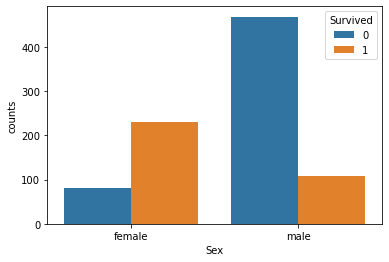

In [211]:
# Survived vs Sex
analytics_1 = data.groupby(['Survived','Sex']).size().reset_index(name='counts')
sns.barplot(x='Sex',y='counts', hue='Survived',data = analytics_1)

<AxesSubplot:xlabel='Survived', ylabel='counts'>

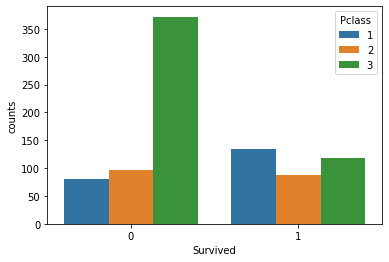

In [212]:
# Survived vs Pclass
analytics_2 = data.groupby(['Survived', 'Pclass']).size().reset_index(name='counts')
sns.barplot(x='Survived',y='counts', hue='Pclass',data = analytics_2)

In [213]:
# Fare  -> Descriptive statistics
data['Fare'].describe()

count    889.000000
mean      32.096681
std       49.697504
min        0.000000
25%        7.895800
50%       14.454200
75%       31.000000
max      512.329200
Name: Fare, dtype: float64

<AxesSubplot:xlabel='Pclass', ylabel='Median'>

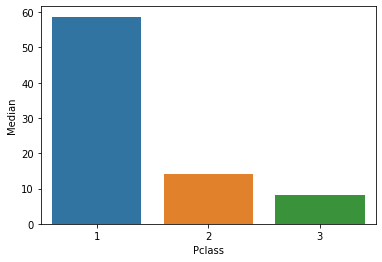

In [214]:
# Fare vs Pclass
analytics_3 = data.groupby(['Pclass']).Fare.median().reset_index(name='Median')
sns.barplot(x='Pclass', y ='Median', data=analytics_3 )

In [215]:
# Fare vs Sex
analytics_4 = data.groupby(['Sex']).Fare.median().reset_index(name='Median')
analytics_4

,Sex,Median
0,female,23.0
1,male,10.5


<AxesSubplot:xlabel='Sex', ylabel='Median'>

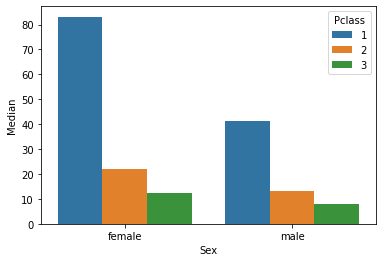

In [216]:
# Fare  vs Sex vs Pclass
analytics_5 = data.groupby(['Sex','Pclass']).Fare.median().reset_index(name='Median')
sns.barplot(x='Sex', y='Median', hue='Pclass', data=analytics_5)

<AxesSubplot:xlabel='Embarked', ylabel='Median'>

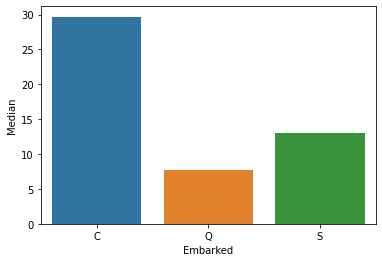

In [217]:
# Fare vs Embark
analytics_6 = data.groupby(['Embarked']).Fare.median().reset_index(name='Median')
sns.barplot(x='Embarked', y='Median', data=analytics_6)

In [218]:
# Correlation
corr = data.corr()
corr.style.background_gradient(cmap='coolwarm') #Corr(Pclass, Fare) = -0.54 -> When Pclass = 1 -> Fare + 
                                                                               # When Pclass = 2 -> Fare -
                                                                               # When Pclass = 3 -> Fare --

,Survived,Pclass,Age,SibSp,Parch,Fare
Survived,1.000000,-0.335549,-0.069822,-0.034040,0.083151,0.255290
Pclass,-0.335549,1.000000,-0.336512,0.081656,0.016824,-0.548193
Age,-0.069822,-0.336512,1.000000,-0.232543,-0.171485,0.093707
SibSp,-0.034040,0.081656,-0.232543,1.000000,0.414542,0.160887
Parch,0.083151,0.016824,-0.171485,0.414542,1.000000,0.217532
Fare,0.255290,-0.548193,0.093707,0.160887,0.217532,1.000000


In [219]:
# Machine learning

In [220]:
# Cambio struttura del data set -> OneHotEncoding 
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import make_column_transformer

transformer = make_column_transformer(
    (OneHotEncoder(drop='first', sparse=False), ['Pclass', 'Sex', 'Embarked']),
    remainder='passthrough')

transformed = transformer.fit_transform(data)
transformed_data = pd.DataFrame(
    transformed, 
    columns=transformer.get_feature_names_out()
)


In [221]:
transformed_data # Pclass1,Female, EmbarkedC -> Baseline

''' Per evitare la trappola delle variabili dummy bisogna inserire nel modello un numero di dummy
che è sempre pari a uno in meno rispetto ai vari livelli che la variabile categoriale in esame
assume. Questo è importate per evitare il problema della multicollinearità'''

' Per evitare la trappola delle variabili dummy bisogna inserire nel modello un numero di dummy\nche è sempre pari a uno in meno rispetto ai vari livelli che la variabile categoriale in esame\nassume. Questo è importate per evitare il problema della multicollinearità'

In [222]:
# Nuove dimensioni del data set
transformed_data.shape

(889, 10)

In [223]:
# Colonne del data set trasformato
transformed_data.columns.values

array(['onehotencoder__Pclass_2', 'onehotencoder__Pclass_3',
       'onehotencoder__Sex_male', 'onehotencoder__Embarked_Q',
       'onehotencoder__Embarked_S', 'remainder__Survived',
       'remainder__Age', 'remainder__SibSp', 'remainder__Parch',
       'remainder__Fare'], dtype=object)

In [224]:
# Rinominiamo le colonne del data set
transformed_data.columns = ['Passenger Class2', 'Passenger Class3', 'Male',
                           'Port_of_Embarkation_Q', 'Port_of_Embarkation_S', 'Survived', 'Age', 'SibSp', 'Parch', 'Fare']

In [225]:
transformed_data.columns.values

array(['Passenger Class2', 'Passenger Class3', 'Male',
       'Port_of_Embarkation_Q', 'Port_of_Embarkation_S', 'Survived',
       'Age', 'SibSp', 'Parch', 'Fare'], dtype=object)

In [226]:
transformed_data

,Passenger Class2,Passenger Class3,Male,Port_of_Embarkation_Q,Port_of_Embarkation_S,Survived,Age,SibSp,Parch,Fare
0,0.0,1.0,1.0,0.0,1.0,0.0,22.0,1.0,0.0,7.2500
1,0.0,0.0,0.0,0.0,0.0,1.0,38.0,1.0,0.0,71.2833
2,0.0,1.0,0.0,0.0,1.0,1.0,26.0,0.0,0.0,7.9250
3,0.0,0.0,0.0,0.0,1.0,1.0,35.0,1.0,0.0,53.1000
4,0.0,1.0,1.0,0.0,1.0,0.0,35.0,0.0,0.0,8.0500
...,...,...,...,...,...,...,...,...,...,...
884,1.0,0.0,1.0,0.0,1.0,0.0,27.0,0.0,0.0,13.0000
885,0.0,0.0,0.0,0.0,1.0,1.0,19.0,0.0,0.0,30.0000
886,0.0,1.0,0.0,0.0,1.0,0.0,28.0,1.0,2.0,23.4500
887,0.0,0.0,1.0,0.0,0.0,1.0,26.0,0.0,0.0,30.0000


In [227]:
transformed_data.isnull().sum()

Passenger Class2         0
Passenger Class3         0
Male                     0
Port_of_Embarkation_Q    0
Port_of_Embarkation_S    0
Survived                 0
Age                      0
SibSp                    0
Parch                    0
Fare                     0
dtype: int64

In [228]:
transformed_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 889 entries, 0 to 888
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Passenger Class2       889 non-null    float64
 1   Passenger Class3       889 non-null    float64
 2   Male                   889 non-null    float64
 3   Port_of_Embarkation_Q  889 non-null    float64
 4   Port_of_Embarkation_S  889 non-null    float64
 5   Survived               889 non-null    float64
 6   Age                    889 non-null    float64
 7   SibSp                  889 non-null    float64
 8   Parch                  889 non-null    float64
 9   Fare                   889 non-null    float64
dtypes: float64(10)
memory usage: 69.6 KB


In [229]:
# Split data in Train and Test set 
features = ['Passenger Class2','Passenger Class3', 'Male', 'Port_of_Embarkation_Q', 'Port_of_Embarkation_S',
           'Age', 'SibSp', 'Parch', 'Fare']

X = transformed_data.loc[:, features]

y = transformed_data.loc[:, ['Survived']]

In [230]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0, train_size = .75)

In [231]:
# Standardization
from sklearn.preprocessing import StandardScaler
X_train[['Age', 'Fare']] = StandardScaler().fit_transform(X_train[['Age', 'Fare']])
X_test[['Age', 'Fare']] = StandardScaler().fit_transform(X_test[['Age', 'Fare']])


In [232]:
# Models 

In [233]:
# KNN -> K = 5 Train set
from sklearn import neighbors
knn_5 = neighbors.KNeighborsClassifier(n_neighbors=5)
knn_5.fit(X_train, y_train.values.ravel())

KNeighborsClassifier()

In [234]:
# KNN -> K = 10 Train set
knn_10 = neighbors.KNeighborsClassifier(n_neighbors=10)
knn_10.fit(X_train, y_train.values.ravel())

KNeighborsClassifier(n_neighbors=10)

In [235]:
# Predict on Test set

In [236]:
knn_5.predict(X_test)

array([1., 0., 1., 0., 0., 0., 0., 0., 0., 1., 0., 1., 1., 1., 1., 0., 1.,
       0., 0., 1., 1., 1., 0., 0., 0., 0., 0., 1., 0., 0., 1., 0., 0., 1.,
       0., 0., 0., 0., 0., 0., 1., 0., 1., 0., 1., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 1., 0., 0., 0., 1., 0., 0., 0., 0., 0., 1., 1.,
       1., 1., 1., 0., 0., 1., 1., 0., 0., 0., 1., 0., 0., 1., 1., 1., 1.,
       1., 0., 0., 0., 0., 0., 0., 1., 0., 0., 1., 1., 1., 1., 1., 0., 1.,
       0., 1., 0., 1., 0., 0., 1., 1., 1., 1., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 1.,
       0., 1., 1., 0., 0., 0., 1., 1., 1., 0., 0., 0., 0., 0., 0., 0., 1.,
       0., 0., 0., 1., 1., 1., 0., 0., 0., 1., 0., 0., 0., 0., 1., 0., 1.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 1., 0., 1., 0., 0., 0.,
       0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 1., 1., 1., 0.,
       0., 1., 0., 1., 0., 0., 1., 1., 1., 1., 1., 1., 1., 0., 1., 1., 1.,
       0., 1.])

In [237]:
knn_10.predict(X_test)

array([0., 0., 1., 0., 0., 0., 0., 0., 0., 1., 0., 1., 0., 0., 1., 0., 1.,
       0., 0., 1., 0., 1., 0., 0., 0., 0., 1., 0., 0., 0., 1., 0., 0., 1.,
       0., 0., 0., 0., 0., 0., 1., 0., 1., 0., 1., 0., 0., 0., 0., 0., 0.,
       0., 0., 1., 0., 0., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1.,
       1., 1., 1., 0., 0., 1., 1., 0., 0., 0., 1., 0., 0., 1., 0., 1., 1.,
       0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 1., 1., 1., 0., 1., 0., 1.,
       0., 1., 0., 1., 0., 0., 0., 1., 1., 1., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 1.,
       0., 1., 1., 0., 0., 0., 1., 1., 1., 0., 0., 0., 0., 0., 0., 0., 1.,
       0., 0., 0., 1., 1., 1., 0., 0., 0., 1., 0., 0., 0., 0., 1., 0., 1.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 1., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 1., 0.,
       0., 1., 0., 1., 0., 0., 1., 1., 0., 1., 1., 0., 1., 0., 0., 1., 0.,
       0., 1.])

In [238]:
# Accuracy Score Test set KNN -> K = 5 
round(knn_5.score(X_test, y_test),2) # 75 % Accuracy 

0.75

In [239]:
# Confusion Matrix KNN -> K = 5 on Test set

In [240]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test, knn_5.predict(X_test)))

[[110  22]
 [ 33  58]]


In [241]:
# Classification Report KNN -> K = 5 on Test set

In [242]:
from sklearn.metrics import classification_report
print(classification_report(y_test, knn_5.predict(X_test)))

              precision    recall  f1-score   support

         0.0       0.77      0.83      0.80       132
         1.0       0.72      0.64      0.68        91

    accuracy                           0.75       223
   macro avg       0.75      0.74      0.74       223
weighted avg       0.75      0.75      0.75       223



In [243]:
# Accuracy Score Test set KNN -> K = 10 
round(knn_10.score(X_test, y_test),2) # 77 % Accuracy

0.77

In [244]:
# Confusion Matrix KNN -> K = 10 on Test set

In [245]:
print(confusion_matrix(y_test, knn_10.predict(X_test)))

[[119  13]
 [ 39  52]]


In [246]:
# Classification Report KNN -> K = 10 on Test set

In [247]:
print(classification_report(y_test, knn_10.predict(X_test)))

              precision    recall  f1-score   support

         0.0       0.75      0.90      0.82       132
         1.0       0.80      0.57      0.67        91

    accuracy                           0.77       223
   macro avg       0.78      0.74      0.74       223
weighted avg       0.77      0.77      0.76       223



In [274]:
# Try 
# creating the Numpy array
array = np.array([[0, 1, 1, 0, 1, 40, 0, 0, 31.0], [1, 0, 0, 1, 0, 20, 0, 0, 31],
                 [0, 1, 1, 0, 1, 35, 1, 1, 7 ], 
                 [0, 0, 0, 1, 0, 15, 0, 0, 31]])
  
# creating a list of index names
index_values = ['first', 'second', 'third', 'fourth']
   
# creating a list of column names
column_values = ['Passenger Class2', 'Passenger Class3', 'Male',
       'Port_of_Embarkation_Q', 'Port_of_Embarkation_S', 'Age', 'SibSp',
       'Parch', 'Fare']
  
# creating the dataframe
df = pd.DataFrame(data = array, 
                  index = index_values, 
                  columns = column_values)

# First observation -> Pclass3 - Male - Port_of_Embarkation_S - 40 Age - 31 Fare
# Second observation -> Pclass2- Female - Port_of_Embarkation_Q - 20 Age - 31 Fare  
# Third observation -> Pclass3 - Male- 

In [275]:
 df

,Passenger Class2,Passenger Class3,Male,Port_of_Embarkation_Q,Port_of_Embarkation_S,Age,SibSp,Parch,Fare
first,0.0,1.0,1.0,0.0,1.0,40.0,0.0,0.0,31.0
second,1.0,0.0,0.0,1.0,0.0,20.0,0.0,0.0,31.0
third,0.0,1.0,1.0,0.0,1.0,35.0,1.0,1.0,7.0
fourth,0.0,0.0,0.0,1.0,0.0,15.0,0.0,0.0,31.0


In [276]:
# Predict on df KNN -> K = 5
knn_5.predict(df) # Survived, Survived, Not Survived, Survived

array([1., 1., 0., 1.])

In [277]:
# Predict on df KNN -> K = 10
knn_10.predict(df) # Survived, Survived, Not Survived, Survived

array([1., 1., 0., 1.])